# Q. Forecast the CocaCola prices.
Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

## Forecasting a Time Series

- Forecasting refers to the process of making predictions or estimating future values based on historical data and patterns. It is widely used in various fields such as economics, finance, sales and marketing, operations management, and weather forecasting, among others.

- The goal of forecasting is to leverage past observations and data patterns to project future values or trends. It helps organizations and individuals make informed decisions, plan resources, allocate budgets, and set goals. Forecasting can be applied to different types of data, including time series data, cross-sectional data, and panel data.

- In the context of time series data, which is a sequence of observations collected over time, forecasting involves predicting future values based on the historical patterns within the data. Time series forecasting methods often take into account factors such as trend, seasonality, cyclicality, and random fluctuations.

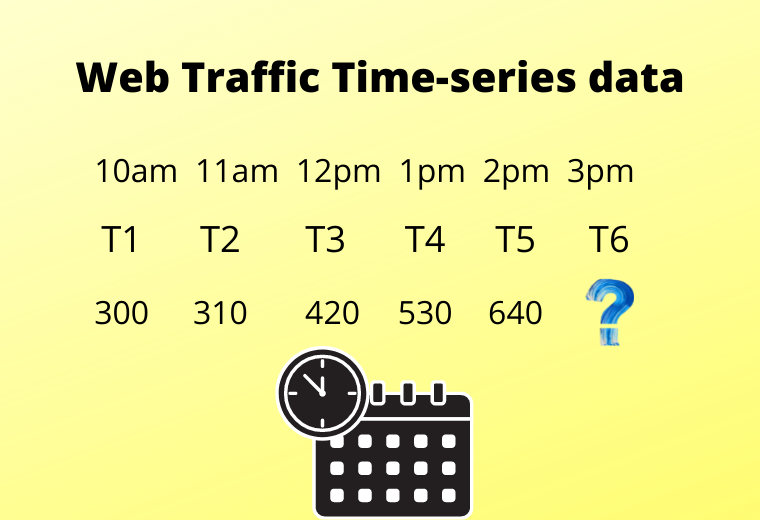

- There are various techniques and models available for forecasting, depending on the characteristics of the data and the specific requirements of the forecasting task. Some commonly used methods include:

1. **Moving Averages**: This method calculates the average of the recent observations to forecast future values.
2. **Exponential Smoothing**: It assigns exponentially decreasing weights to past observations and calculates a weighted average for forecasting.
3. **ARIMA (Auto Regressive Integrated Moving Average)**: It combines autoregressive, differencing, and moving average components to model and forecast time series data.
4. **Prophet**: This is a forecasting model developed by Facebook that handles time series data with trend, seasonality, and holiday effects.
5. **Machine Learning Algorithms**: Techniques like linear regression, decision trees, random forests, and neural networks can be used for time series forecasting.

- The choice of forecasting method depends on factors such as data characteristics, availability of historical data, presence of patterns, forecast horizon, and the accuracy requirements of the forecast.



## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt

from pandas import Grouper
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose
## with the help of this we will be able to creat graphs for the dfferent components of time series data 
#like trends, level, sesional components and residual data

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Importing Dataset

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True)

In [3]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## EDA - Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


### Convert quarterly periods to datetime

In [5]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [6]:
df

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


### Conversion : Into datetime format

In [7]:
df['date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))

C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\3756899200.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [8]:
df

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter_Year  42 non-null     object        
 3   date          42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


## Droping the column `Quarter` and `Quarter_Year` from the dataset as we got our required date time column and no need for object coumn

In [11]:
df.drop(columns=['Quarter','Quarter_Year'],inplace=True)

In [12]:
df

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01
5,2104.411995,1987-04-01
6,2014.362999,1987-07-01
7,1991.746998,1987-10-01
8,1869.049999,1988-01-01
9,2313.631996,1988-04-01


### Null values

In [13]:
df.isnull().sum().sum()

0

**There are no `nan` values in the data set**

### Duplicate Values

In [15]:
df[df.duplicated()].shape

(0, 2)

**There are no `duplicated`values in the dataset**

### Shifting the columns of `date` and `Sales`

In [17]:
Df = df[['date','Sales']]

In [18]:
Df

,date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [19]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    42 non-null     datetime64[ns]
 1   Sales   42 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


In [20]:
Df.describe()

,date,Sales
count,42,42.000000
mean,1991-02-14 23:25:42.857142912,2994.353308
min,1986-01-01 00:00:00,1547.818996
25%,1988-07-24 00:00:00,2159.714247
50%,1991-02-15 00:00:00,2782.376999
75%,1993-09-08 00:00:00,3609.250000
max,1996-04-01 00:00:00,5253.000000
std,NaN,977.930896


### Converted `date` column to index

In [21]:
Df.set_index('date',inplace=True)

In [22]:
Df.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [23]:
Df.index.year

Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1988,
       1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991,
       1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994,
       1995, 1995, 1995, 1995, 1996, 1996],
      dtype='int32', name='date')

### Creating Copy of the Dataset

In [24]:
DF = Df.copy()

In [25]:
DF

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


## Visualization 

- ### Line Plot

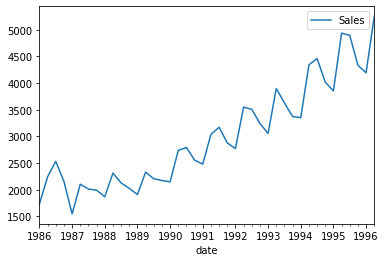

In [27]:
DF.plot()
plt.show()

#### Observation:
- We can see that there is an increasing Trend. So, Trend is not constant.
- The trend is quadratic or exponential
- Variance is also not constant.
- Hence the time serise is not stationary.

- ### Histogram

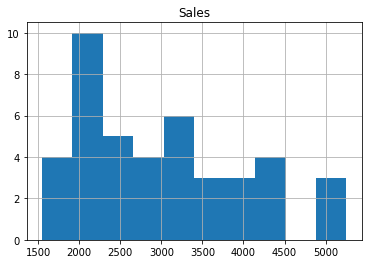

In [29]:
DF.hist()
plt.show()

- ### Density Plots

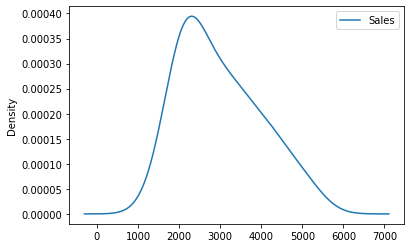

In [30]:
DF.plot(kind='kde')
plt.show()

- ### Box and Whisker Plots by Interval

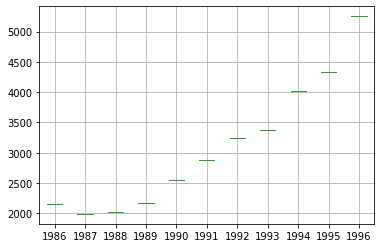

In [31]:
groups = DF.groupby(Grouper(freq='q'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values.reshape(-1,)
years.boxplot()
plt.show()

- ### Lag Plot

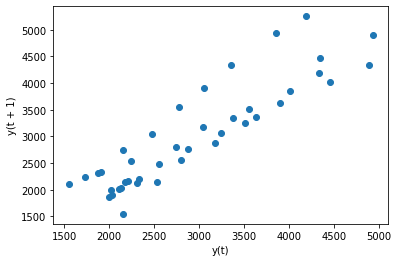

In [32]:
lag_plot(DF)
plt.show()

- ### Autocorrelation Plot

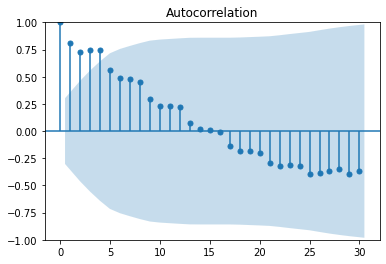

In [33]:
plot_acf(DF,lags=30)
plt.show()

## UpSampling

In [34]:
upsampled = DF.resample('M').mean()
print(upsampled.head(32))

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


### Interplation : It is done for `nan` values which we get after doing upsampling

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


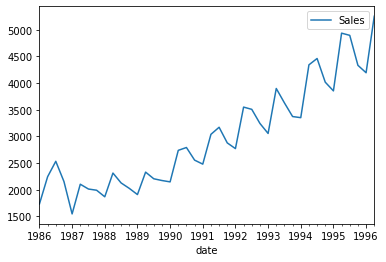

In [35]:
interpolated = upsampled.interpolate(method='linear') 
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [36]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


## Feature Scaling : Tranformations

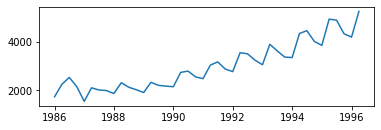

In [37]:
#Line plot
plt.subplot(211)
plt.plot(DF)

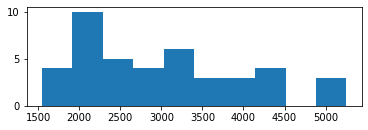

In [38]:
#Histogram
plt.subplot(212)
plt.hist(DF)
plt.show()

- ## Square Root Transform

In [39]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

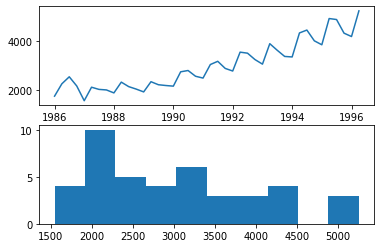

In [40]:
# Line plot
plt.subplot(211)
plt.plot(DF['Sales'])

# histogram
plt.subplot(212)
plt.hist(DF['Sales'])
plt.show()

- ## Log Transform

In [41]:
from numpy import log

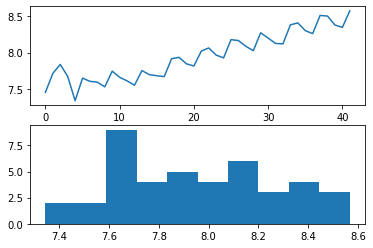

In [42]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = log(dataframe['Sales'])

# Line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

In [43]:
Train = interpolated.head(112)
Test = interpolated.tail(12)

- ## Moving Average

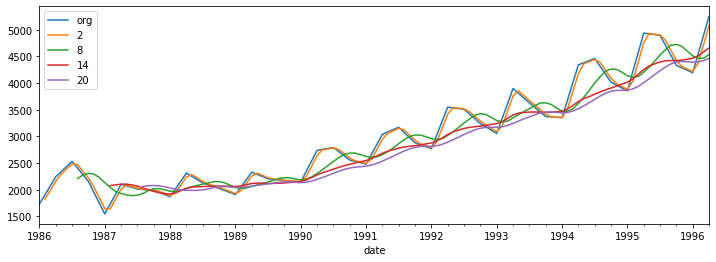

In [44]:
plt.figure(figsize=(12,4))
interpolated.Sales.plot(label="org")
for i in range(2,24,6):
    interpolated["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

- ## Time series decomposition plot

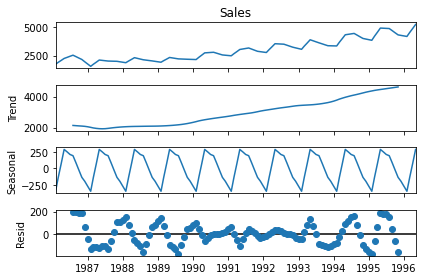

In [46]:
# Perform seasonal decomposition
decompose_ts_add = seasonal_decompose(interpolated.Sales, period=12)

# Plot the decomposed components
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

`Auto Correlation Function (ACF)`
- The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number of periods or units. A lag corresponds to a certain point in time after which we observe the first value in the time series.

- The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship). A coefficient of 0 means that there is no relationship between the variables. Also, most often, it is measured either by Pearson’s correlation coefficient or by Spearman’s rank correlation coefficient.

- It’s most often used to analyze sequences of numbers from random processes, such as economic or scientific measurements. It can also be used to detect systematic patterns in correlated data sets such as securities prices or climate measurements. Usually, we can calculate the ACF using statistical packages from Python and R or using software such as Excel and SPSS. Below, we can see an example of the ACF plot:

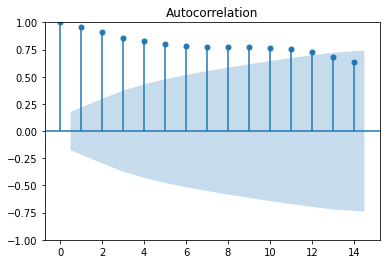

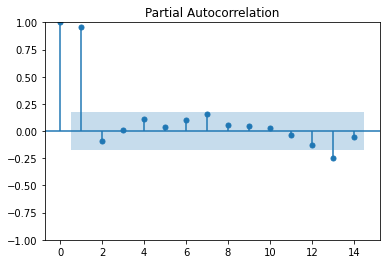

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Sales,lags=14)
tsa_plots.plot_pacf(interpolated.Sales,lags=14)
plt.show()

- Blue bars on an ACF plot above are the error bands, and anything within these bars is not statistically significant. It means that correlation values outside of this area are very likely a correlation and not a statistical fluke. The confidence interval is set to 95% by default.

- Hence for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.

**To summarize, autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation**

`Partial Auto Correlation Function (PACF)`
- Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables. For example, if we’re regressing a signal S at lag t (S_{t}) with the same signal at lags t-1, t-2 and t-3 (S_{t-1}, S_{t-2}, S_{t-3}), the partial correlation between S_{t} and S_{t-3} is the amount of correlation between S_{t} and S_{t-3} that isn’t explained by their mutual correlations with S_{t-1} and S_{t-2}.

- So, the way of finding PACF between S_{t} and S_{t-3} is to use regression model

\begin{align*} S_{t} = \phi_{1}S_{t-1} + \phi_{2}S_{t-2} + \phi_{3}S_{t-3} + \epsilon \end{align*}

where, \phi_{1}, \phi_{2} and \phi_{3} are coefficients and \epsilon is error. From the regression formula above, the PACF value between S_{t} and S_{t-3} is the coefficient \pi_{3}. This coefficient will give us direct effect of time-series S_{t-3} to the time-series S_{t} because the effects of S_{t-2} and S_{t-1} are already captured by \phi_{1} and \phi_{2}.

## Evaluation Metric : MAPE

In [48]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

- ### Simple Exponential Method

In [49]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

C:\Users\Rohit Shelar\anaconda3\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


7.5289201512676796

- ### Holt method (Double Exponential)

**Captures both Level and Trend.**

In [50]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\3240688955.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
C:\Users\Rohit Shelar\anaconda3\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


7.969116128525972

- ### Holts Winter Exponential Smoothing : With Additive Seasonality and Additive trend (Triple Exponential)

**Captures Level, Trend and Seasonality.**

In [51]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\4026159833.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


5.072352949061625

- ### Holts Winter Exponential Smoothing : With Multiplicative Seasonality and Additive trend (Triple Exponential)

In [52]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\1220719482.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


4.767933956510746

In [53]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Sales))
rmse_hwe_mul_add

249.3716445007406

## Final Model : By combining train and test

In [54]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Sales"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [55]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

1996-05-31    5655.324123
1996-06-30    6054.967219
1996-07-31    6435.094479
1996-08-31    6805.469250
1996-09-30    7109.672192
1996-10-31    7440.590214
1996-11-30    7705.784980
1996-12-31    8064.821602
1997-01-31    8365.203568
1997-02-28    8734.062353
Freq: M, dtype: float64

In [56]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [57]:
interpolated.reset_index(inplace=True)

In [58]:
interpolated['t'] = 1

In [59]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1
...,...,...,...
119,1995-12-31,4240.333333,1
120,1996-01-31,4194.000000,1
121,1996-02-29,4547.000000,1
122,1996-03-31,4900.000000,1


In [60]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
C:\Users\Rohit Shelar\AppData\Local\Temp\ipykernel_10848\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t

In [61]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


## Inserted `t_sq` column with values

In [62]:
interpolated['t_sq'] = (interpolated['t'])**2

In [63]:
interpolated

,date,Sales,t,t_sq
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25
...,...,...,...,...
119,1995-12-31,4240.333333,120,14400
120,1996-01-31,4194.000000,121,14641
121,1996-02-29,4547.000000,122,14884
122,1996-03-31,4900.000000,123,15129


In [64]:
interpolated["month"] = interpolated.date.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.date.dt.strftime("%Y") # year extraction

In [65]:
interpolated

,date,Sales,t,t_sq,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986
...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995
120,1996-01-31,4194.000000,121,14641,Jan,1996
121,1996-02-29,4547.000000,122,14884,Feb,1996
122,1996-03-31,4900.000000,123,15129,Mar,1996


In [66]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column

In [67]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,True,False,False,False,False,False,False,False,False,False
120,False,False,False,False,True,False,False,False,False,False,False,False
121,False,False,False,True,False,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False,True,False,False,False,False


### Storing the `months` serial wise again in months variable

In [68]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [69]:
Coka_Cola = pd.concat([interpolated,months],axis=1)

In [70]:
Coka_Cola.head()

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,1,1,Jan,1986,True,False,False,False,False,False,False,False,False,False,False,False
1,1986-02-28,1904.871666,2,4,Feb,1986,False,True,False,False,False,False,False,False,False,False,False,False
2,1986-03-31,2074.916332,3,9,Mar,1986,False,False,True,False,False,False,False,False,False,False,False,False
3,1986-04-30,2244.960999,4,16,Apr,1986,False,False,False,True,False,False,False,False,False,False,False,False
4,1986-05-31,2341.242330,5,25,May,1986,False,False,False,False,True,False,False,False,False,False,False,False


In [71]:
Coka_Cola['log_sales'] = np.log(Coka_Cola['Sales'])

In [72]:
Coka_Cola

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,True,False,False,False,False,False,False,False,False,False,False,False,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,False,True,False,False,False,False,False,False,False,False,False,False,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,False,False,True,False,False,False,False,False,False,False,False,False,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,False,False,False,True,False,False,False,False,False,False,False,False,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,False,False,False,False,True,False,False,False,False,False,False,False,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,False,False,False,False,False,False,False,False,False,False,False,True,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,True,False,False,False,False,False,False,False,False,False,False,False,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,False,True,False,False,False,False,False,False,False,False,False,False,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,False,False,True,False,False,False,False,False,False,False,False,False,8.496990


### Heatmap : Month wise

<Axes: xlabel='month', ylabel='year'>

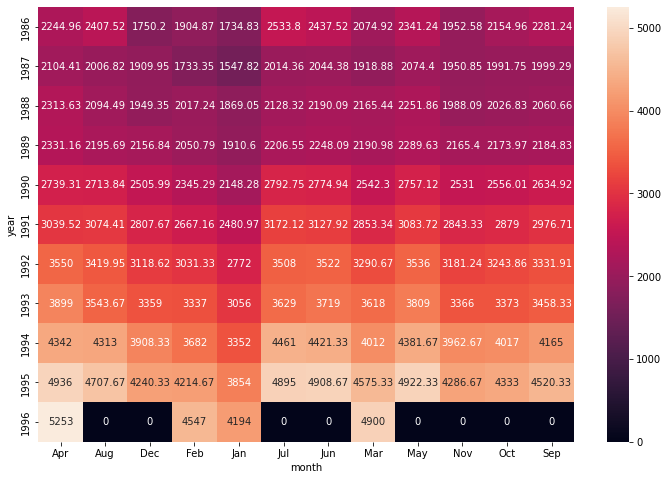

In [73]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Coka_Cola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

### Box Plot

<Axes: xlabel='year', ylabel='Sales'>

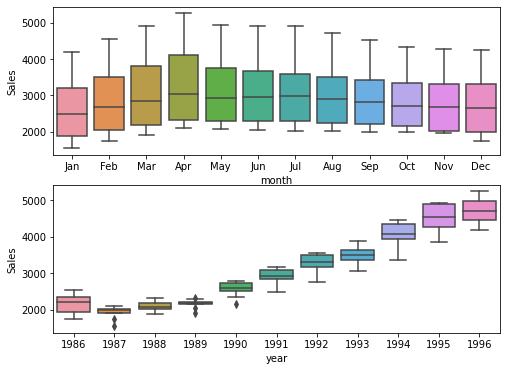

In [74]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data= Coka_Cola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=Coka_Cola)

### Line Plot

<Axes: xlabel='year', ylabel='Sales'>

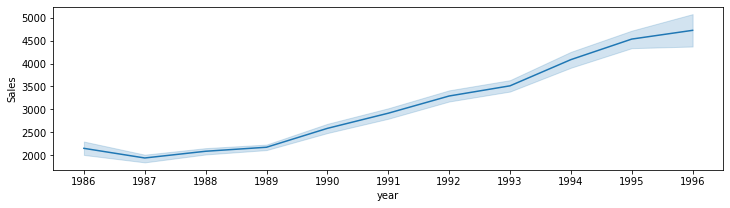

In [75]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=Coka_Cola)

## Splitting data

In [76]:
Train = Coka_Cola.head(110) # training data
Test = Coka_Cola.tail(14) # test Data

- ### Linear Method

In [77]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

638.1208225922795

- ### Exponential Method

In [78]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

494.44069305457606

- ### Quadratic Method

In [79]:
Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

387.28160082925666

- ### Additive Seasonality

In [80]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1881.8135899060212

- ### Additive Seasonality Quadratic 

In [81]:
add_sea_Quad = smf.ols('Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

242.7766044348814

- ### Multiplicative Seasonality

In [82]:
Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1973.2620608123054

- ### Multiplicative Additive Seasonality 

In [83]:
Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

275.2750321117329

## Comparing the results 

In [84]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,242.776604
6,rmse_Mult_add_sea,275.275032
2,rmse_Quad,387.281601
1,rmse_Exp,494.440693
0,rmse_linear,638.120823
3,rmse_add_sea,1881.813590
5,rmse_Mult_sea,1973.262061


# Conclusion : `Linear Model - rmse_linear` will be prefered than any other in this analysis as it got the lowest RMSE and lowest MAPE.